=== Implémentation CNN avec Keras/TensorFlow ===

Chargement du dataset MNIST...
Distribution des classes:
labels
0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: count, dtype: int64


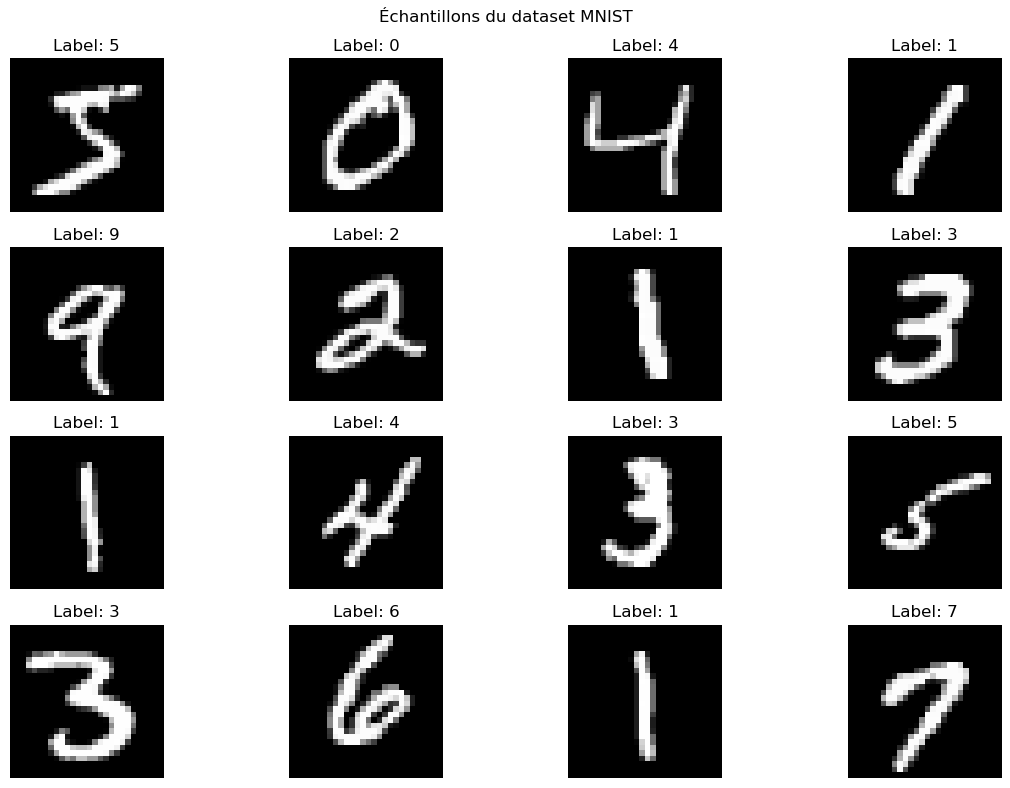


Création du modèle CNN...


C:\Users\pc\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 2, 2, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │           6,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 96,534 (377.09 KB)

 Trainable params: 96,534 (377.09 KB)

 Non-trainable params: 0 (0.00 B)


Entraînement du modèle...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 0.7932 - loss: 0.6264 - val_accuracy: 0.9818 - val_loss: 0.0618 - learning_rate: 0.0010
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 25ms/step - accuracy: 0.9776 - loss: 0.0773 - val_accuracy: 0.9883 - val_loss: 0.0412 - learning_rate: 0.0010
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9846 - loss: 0.0535 - val_accuracy: 0.9880 - val_loss: 0.0422 - learning_rate: 0.0010
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.9891 - loss: 0.0374 - val_accuracy: 0.9902 - val_loss: 0.0353 - learning_rate: 0.0010
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9916 - loss: 0.0289 - val_accuracy: 0.9900 - val_loss: 0.0370 - learning_rate: 0.0010
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9926 - loss: 0.0250 - val_accuracy: 0.9887 - val_loss: 0.0416 - learning_rate: 0.0010
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━

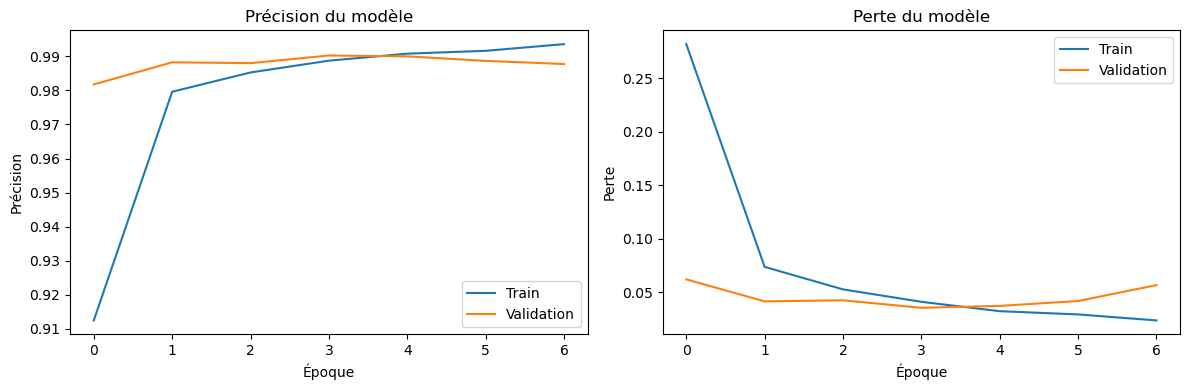


Modèle sauvegardé sous 'cnn_keras_model.h5'

Précision finale: 0.9913


In [15]:
# Implémentation CNN avec Keras/TensorFlow - Code Complet

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import mnist
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# =============================================
# 1. CHARGEMENT ET VISUALISATION DES DONNÉES
# =============================================

def load_and_visualize_data():
    """Charge et visualise le dataset MNIST"""
    print("Chargement du dataset MNIST...")
    
    # Chargement des données
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    
    # Distribution des classes avec pandas
    train_df = pd.DataFrame({'labels': y_train})
    print("Distribution des classes:")
    print(train_df['labels'].value_counts().sort_index())
    
    # Visualisation des échantillons
    plt.figure(figsize=(12, 8))
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.imshow(X_train[i], cmap='gray')
        plt.title(f'Label: {y_train[i]}')
        plt.axis('off')
    plt.suptitle('Échantillons du dataset MNIST')
    plt.tight_layout()
    plt.show()
    
    return (X_train, y_train), (X_test, y_test)

# =============================================
# 2. CRÉATION DU MODÈLE CNN
# =============================================

def create_cnn_model():
    """Crée le modèle CNN selon l'architecture spécifiée"""
    model = Sequential([
        # conv1: 32 convolutions 5x5, suivie de ReLU
        Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)),
        
        # pool1: max-pooling 2x2
        MaxPooling2D((2, 2)),
        
        # conv2: 64 convolutions 5x5, suivie de ReLU
        Conv2D(64, (5, 5), activation='relu'),
        
        # pool2: max-pooling 2x2
        MaxPooling2D((2, 2)),
        
        # conv3: 64 convolutions 3x3 (ajusté)
        Conv2D(64, (3, 3), activation='relu'),
        
        # pool3: max-pooling 2x2
        MaxPooling2D((2, 2)),
        
        # Aplatissement
        Flatten(),
        
        # fc4: couche entièrement connectée, 100 neurones
        Dense(100, activation='relu'),
        Dropout(0.5),
        
        # fc5: couche entièrement connectée, 10 neurones, softmax
        Dense(10, activation='softmax')
    ])
    
    # Compilation du modèle
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# =============================================
# 3. PRÉPARATION DES DONNÉES
# =============================================

def prepare_data(X_train, y_train, X_test, y_test):
    """Prépare les données pour l'entraînement"""
    # Redimensionnement et normalisation
    X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
    X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
    
    # Encodage one-hot des labels
    y_train_cat = to_categorical(y_train, 10)
    y_test_cat = to_categorical(y_test, 10)
    
    return X_train, y_train_cat, X_test, y_test_cat

# =============================================
# 4. AUGMENTATION DE DONNÉES
# =============================================

def create_data_generator():
    """Crée un générateur d'augmentation de données"""
    datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1
    )
    return datagen

# =============================================
# 5. ENTRAÎNEMENT DU MODÈLE
# =============================================

def train_model(model, X_train, y_train_cat, use_augmentation=False):
    """Entraîne le modèle CNN"""
    # Callbacks
    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )
    
    lr_reducer = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=0.0001
    )
    
    callbacks = [early_stop, lr_reducer]
    
    if use_augmentation:
        # Avec augmentation de données
        datagen = create_data_generator()
        datagen.fit(X_train)
        
        history = model.fit(
            datagen.flow(X_train, y_train_cat, batch_size=32),
            steps_per_epoch=len(X_train) // 32,
            epochs=10,
            validation_split=0.2,
            callbacks=callbacks,
            verbose=1
        )
    else:
        # Sans augmentation
        history = model.fit(
            X_train, y_train_cat,
            batch_size=32,
            epochs=10,
            validation_split=0.2,
            callbacks=callbacks,
            verbose=1
        )
    
    return history

# =============================================
# 6. ÉVALUATION DU MODÈLE
# =============================================

def evaluate_model(model, X_test, y_test_cat):
    """Évalue le modèle sur les données de test"""
    test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
    
    print(f"\nRésultats sur les données de test:")
    print(f"Précision: {test_accuracy:.4f}")
    print(f"Perte: {test_loss:.4f}")
    
    return test_loss, test_accuracy

# =============================================
# 7. VISUALISATION DES RÉSULTATS
# =============================================

def plot_training_history(history):
    """Affiche les courbes d'apprentissage"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Précision
    ax1.plot(history.history['accuracy'], label='Train')
    ax1.plot(history.history['val_accuracy'], label='Validation')
    ax1.set_title('Précision du modèle')
    ax1.set_ylabel('Précision')
    ax1.set_xlabel('Époque')
    ax1.legend()
    
    # Perte
    ax2.plot(history.history['loss'], label='Train')
    ax2.plot(history.history['val_loss'], label='Validation')
    ax2.set_title('Perte du modèle')
    ax2.set_ylabel('Perte')
    ax2.set_xlabel('Époque')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# =============================================
# 8. FONCTION PRINCIPALE
# =============================================

def main():
    """Fonction principale d'exécution"""
    print("=== Implémentation CNN avec Keras/TensorFlow ===\n")
    
    # 1. Chargement des données
    (X_train, y_train), (X_test, y_test) = load_and_visualize_data()
    
    # 2. Préparation des données
    X_train, y_train_cat, X_test, y_test_cat = prepare_data(X_train, y_train, X_test, y_test)
    
    # 3. Création du modèle
    print("\nCréation du modèle CNN...")
    model = create_cnn_model()
    model.summary()
    
    # 4. Entraînement
    print("\nEntraînement du modèle...")
    history = train_model(model, X_train, y_train_cat, use_augmentation=False)
    
    # 5. Évaluation
    test_loss, test_accuracy = evaluate_model(model, X_test, y_test_cat)
    
    # 6. Visualisation
    plot_training_history(history)
    
    # 7. Sauvegarde du modèle
    model.save('cnn_keras_model.h5')
    print("\nModèle sauvegardé sous 'cnn_keras_model.h5'")
    
    return model, history, test_accuracy

if __name__ == "__main__":
    model, history, accuracy = main()
    print(f"\nPrécision finale: {accuracy:.4f}")